In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! mv shape_predictor_68_face_landmarks.dat.bz2 /content/drive/MyDrive/aiffel/camera_sticker/models
!cd /content/drive/MyDrive/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2024-11-18 07:26:44--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  78.0MB/s    in 0.8s    

2024-11-18 07:26:45 (78.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [73]:
# 필요한 패키지 import 하기
import cv2
import numpy as np
import dlib
import os
import re
import matplotlib.pyplot as plt

In [74]:
# 경로 설정
base_path = '/content/drive/MyDrive/aiffel/camera_sticker/images/'
sticker_path = '/content/drive/MyDrive/aiffel/camera_sticker/images/sticker.png'
model_path = "/content/drive/MyDrive/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat"


In [239]:
# 사용자 입력: 처리할 이미지 이름
image_name = input("처리할 이미지의 이름을 입력하세요 (예: images2.png): ")
my_image_path = base_path + image_name

처리할 이미지의 이름을 입력하세요 (예: images2.png): images5.png


In [240]:
# 이미지 번호 추출 (예: images2.png -> 2)
image_number = re.search(r'\d+', image_name)  # 숫자만 추출
if image_number:
    image_number = image_number.group()
else:
    image_number = "unknown"  # 번호가 없으면 기본값 설정
print(image_number)

5


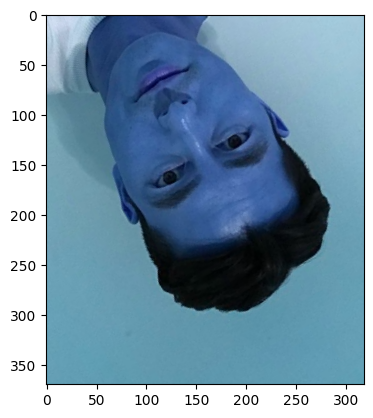

In [241]:
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

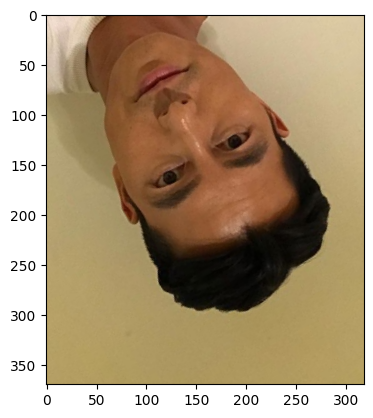

In [242]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [243]:
#저장한 landmark 모델을 불러옵니다.
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄


# dlib 모델 초기화
detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(model_path)  # 모델 파일 필요

rectangles[]


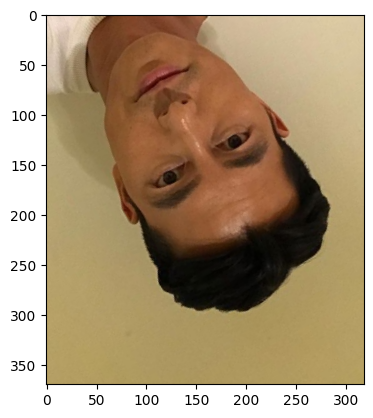

In [244]:

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [ ]:
'''시도하였으나 작동하지 않음(검출기 회전 시도)
# dlib 얼굴 검출기 선언
detector = dlib.get_frontal_face_detector()

# 플래그 초기화
flipped_lr = False  # 좌우 반전 플래그
flipped_tb = False  # 상하 반전 플래그
resized = False     # 크기 조정 플래그

# 이미지 로드 및 RGB 변환

if img_bgr is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 원본 이미지에서 얼굴 검출 시도
dlib_rects = detector(img_rgb, 1)

# 좌우 반전 시도
if len(dlib_rects) == 0:
    print("얼굴을 찾을 수 없습니다. 이미지를 좌우 반전합니다.")
    img_rgb_flipped_lr = cv2.flip(img_rgb, 1)
    dlib_rects = detector(img_rgb_flipped_lr, 1)
    flipped_lr = True

# 상하 반전 시도
if len(dlib_rects) == 0:
    print("좌우 반전에서도 얼굴을 찾을 수 없습니다. 이미지를 상하 반전합니다.")
    img_rgb_flipped_tb = cv2.flip(img_rgb, 0)
    dlib_rects = detector(img_rgb_flipped_tb, 1)
    flipped_lr = False
    flipped_tb = True

# 이미지 크기 조정 시도
if len(dlib_rects) == 0:
    print("상하 반전에서도 얼굴을 찾을 수 없습니다. 이미지 크기를 줄입니다.")
    img_rgb_resized = cv2.resize(img_rgb, (img_rgb.shape[1] // 2, img_rgb.shape[0] // 2))
    dlib_rects = detector(img_rgb_resized, 1)
    resized = True

# 얼굴을 여전히 찾지 못한 경우 예외 처리
if len(dlib_rects) == 0:
    raise RuntimeError("얼굴을 찾을 수 없습니다. 이미지가 올바른 방향인지 확인하세요.")

# 얼굴 영역 복원
if flipped_lr:
    print("좌우 반전된 이미지에서 얼굴을 찾았습니다. 좌표 복원 중...")
    img_width = img_rgb.shape[1]
    dlib_rects = [
        dlib.rectangle(
            img_width - rect.right(),
            rect.top(),
            img_width - rect.left(),
            rect.bottom()
        )
        for rect in dlib_rects
    ]

if flipped_tb:
    print("상하 반전된 이미지에서 얼굴을 찾았습니다. 좌표 복원 중...")
    img_height = img_rgb.shape[0]
    dlib_rects = [
        dlib.rectangle(
            rect.left(),
            img_height - rect.bottom(),
            rect.right(),
            img_height - rect.top()
        )
        for rect in dlib_rects
    ]

if resized:
    print("크기 조정된 이미지에서 얼굴을 찾았습니다. 좌표 복원 중...")
    dlib_rects = [
        dlib.rectangle(
            rect.left() * 2,
            rect.top() * 2,
            rect.right() * 2,
            rect.bottom() * 2
        )
        for rect in dlib_rects
    ]

# 결과 출력
for rect in dlib_rects:
    print(f"얼굴 영역: 왼쪽 {rect.left()}, 위 {rect.top()}, 오른쪽 {rect.right()}, 아래 {rect.bottom()}")

'''

In [245]:
#상하좌우 반전 시 검출되지 않음
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

IndexError: list index out of range

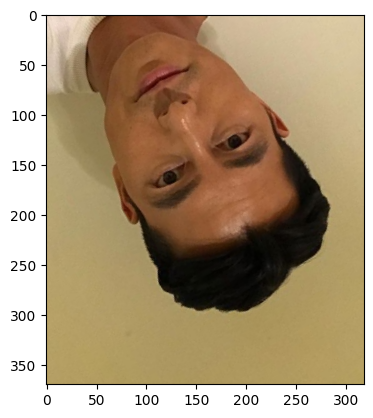

In [246]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [247]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

## 코딩 중 꼬여서 이 코드만 실행 부탁드려요

In [248]:
#이코드만 실행

# 이미지 검증
if img_bgr is None:
    raise FileNotFoundError(f"이미지를 불러올 수 없습니다: {my_image_path}")
if sticker_img is None:
    raise FileNotFoundError(f"스티커 이미지를 불러올 수 없습니다: {sticker_path}")

# RGB 변환 (dlib는 RGB를 사용)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 검출 시도 (원본, 좌우 반전, 상하 반전, 크기 조정 등)
flipped_lr = False  # 좌우 반전 플래그
flipped_tb = False  # 상하 반전 플래그
resized = False     # 크기 조정 플래그

dlib_rects = detector(img_rgb, 1)

# 얼굴을 찾지 못하면 다른 시도를 함
if len(dlib_rects) == 0:
    print("얼굴을 찾을 수 없습니다. 이미지를 좌우 반전합니다.")
    img_rgb_flipped_lr = cv2.flip(img_rgb, 1)
    dlib_rects = detector(img_rgb_flipped_lr, 1)
    flipped_lr = True

if len(dlib_rects) == 0:
    print("좌우 반전에서도 얼굴을 찾을 수 없습니다. 이미지를 상하 반전합니다.")
    img_rgb_flipped_tb = cv2.flip(img_rgb, 0)
    dlib_rects = detector(img_rgb_flipped_tb, 1)
    flipped_lr = False
    flipped_tb = True

if len(dlib_rects) == 0:
    print("상하 반전에서도 얼굴을 찾을 수 없습니다. 이미지 크기를 줄여 시도합니다.")
    img_rgb_resized = cv2.resize(img_rgb, (img_rgb.shape[1] // 2, img_rgb.shape[0] // 2))
    dlib_rects = detector(img_rgb_resized, 1)
    resized = True

# 여전히 얼굴을 찾을 수 없는 경우 예외 처리
if len(dlib_rects) == 0:
    raise RuntimeError("얼굴을 찾을 수 없습니다. 이미지가 올바른 방향인지 확인하세요.")

# 랜드마크 검출
list_landmarks = []
for dlib_rect in dlib_rects:
    if flipped_lr and not flipped_tb:
        points = landmark_predictor(img_rgb_flipped_lr, dlib_rect)  # 좌우 반전 이미지 기준
    elif flipped_tb and not flipped_lr:
        points = landmark_predictor(img_rgb_flipped_tb, dlib_rect)  # 상하 반전 이미지 기준
    elif resized:
        points = landmark_predictor(img_rgb_resized, dlib_rect)  # 크기 조정된 이미지 기준
    else:
        points = landmark_predictor(img_rgb, dlib_rect)  # 원본 이미지 기준

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  # (x, y) 형태로 변환
    list_landmarks.append(list_points)

if not list_landmarks:
    raise RuntimeError("얼굴 랜드마크를 찾을 수 없습니다.")

# 첫 번째 얼굴의 랜드마크 가져오기
landmarks = list_landmarks[0]

# 좌표 복원 (반전 및 크기 조정의 영향을 제거)
if flipped_lr:
    landmarks = [(img_rgb.shape[1] - x, y) for x, y in landmarks]  # 좌우 반전 복원
if flipped_tb:
    landmarks = [(x, img_rgb.shape[0] - y) for x, y in landmarks]  # 상하 반전 복원
if resized:
    landmarks = [(x * 2, y * 2) for x, y in landmarks]  # 크기 복원

# 각도 계산 (눈 좌표 기반)
left_eye = landmarks[36]  # 왼쪽 눈
right_eye = landmarks[45]  # 오른쪽 눈
delta_x = right_eye[0] - left_eye[0]
delta_y = right_eye[1] - left_eye[1]
angle = np.degrees(np.arctan2(delta_y, delta_x))  # 얼굴 기울기 계산

point_30 = landmarks[30]  # 코 아래 (30번 랜드마크)
point_33 = landmarks[33]  # 코 중앙 (33번 랜드마크)

# 스티커 위치 계산 (30번과 33번 사이의 중간 지점)
center_x = (point_30[0] + point_33[0]) // 2
center_y = (point_30[1] + point_33[1]) // 2

# 스티커 크기 조정 (얼굴 크기에 비례)
sticker_width = int(dlib_rects[0].width() * 0.9)  # 얼굴 너비의 90% 크기
sticker_height = int(sticker_img.shape[0] * (sticker_width / sticker_img.shape[1]))
sticker_resized = cv2.resize(sticker_img, (sticker_width, sticker_height))

# 스티커 회전
opposite_angle = -angle  # 얼굴 각도의 반대 방향
rotation_matrix = cv2.getRotationMatrix2D((sticker_width // 2, sticker_height // 2), opposite_angle, 1)
rotated_sticker = cv2.warpAffine(sticker_resized, rotation_matrix, (sticker_width, sticker_height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))

# 스티커 배치 좌표 계산
sticker_x = center_x - sticker_width // 2
sticker_y = center_y - sticker_height // 2

# 스티커를 이미지에 적용
for i in range(rotated_sticker.shape[0]):
    for j in range(rotated_sticker.shape[1]):
        if rotated_sticker[i, j, 3] != 0:  # 알파 채널이 0이 아닌 경우
            y_offset = sticker_y + i
            x_offset = sticker_x + j
            if 0 <= y_offset < img_bgr.shape[0] and 0 <= x_offset < img_bgr.shape[1]:
                img_bgr[y_offset, x_offset] = rotated_sticker[i, j, :3]


얼굴을 찾을 수 없습니다. 이미지를 좌우 반전합니다.
좌우 반전에서도 얼굴을 찾을 수 없습니다. 이미지를 상하 반전합니다.


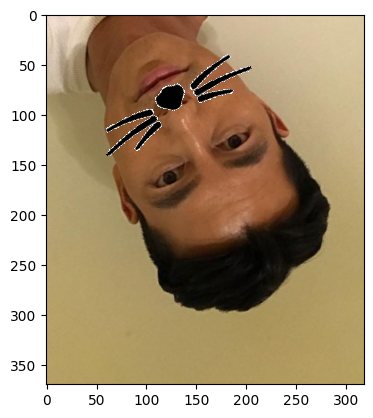

In [249]:
#이미지출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [250]:
# 결과 이미지 저장(이미지 번호를 받아 저장)
output_path = base_path + f"face_with_sticker_result_{image_number}.png"
cv2.imwrite(output_path, img_bgr)
print(f"처리된 이미지가 저장되었습니다: {output_path}")

처리된 이미지가 저장되었습니다: /content/drive/MyDrive/aiffel/camera_sticker/images/face_with_sticker_result_5.png


In [224]:
sticker_img = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
print (sticker_img.shape)


img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))


#print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
print (img_sticker.shape)

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인





(512, 512, 3)
(187, 187, 3)
(187, 187, 3)


In [225]:
# 이미지 검증
if img_bgr is None:
    raise FileNotFoundError(f"이미지를 불러올 수 없습니다: {my_image_path}")
if sticker_img is None:
    raise FileNotFoundError(f"스티커 이미지를 불러올 수 없습니다: {sticker_path}")

# RGB 변환 (dlib는 RGB를 사용)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#모든 이미지에서 작동(상하, 좌우 반전)

In [235]:
#모든이미지에서 작동
# 얼굴 검출 시도 (원본, 좌우 반전, 상하 반전, 크기 조정 등)
flipped_lr = False  # 좌우 반전 플래그
flipped_tb = False  # 상하 반전 플래그
resized = False     # 크기 조정 플래그

dlib_rects = detector(img_rgb, 1)

# 얼굴을 찾지 못하면 다른 시도를 함
if len(dlib_rects) == 0:
    print("얼굴을 찾을 수 없습니다. 이미지를 좌우 반전합니다.")
    img_rgb_flipped_lr = cv2.flip(img_rgb, 1)
    dlib_rects = detector(img_rgb_flipped_lr, 1)
    flipped_lr = True

if len(dlib_rects) == 0:
    print("좌우 반전에서도 얼굴을 찾을 수 없습니다. 이미지를 상하 반전합니다.")
    img_rgb_flipped_tb = cv2.flip(img_rgb, 0)
    dlib_rects = detector(img_rgb_flipped_tb, 1)
    flipped_lr = False
    flipped_tb = True

if len(dlib_rects) == 0:
    print("상하 반전에서도 얼굴을 찾을 수 없습니다. 이미지 크기를 줄여 시도합니다.")
    img_rgb_resized = cv2.resize(img_rgb, (img_rgb.shape[1] // 2, img_rgb.shape[0] // 2))
    dlib_rects = detector(img_rgb_resized, 1)
    resized = True

# 여전히 얼굴을 찾을 수 없는 경우 예외 처리
if len(dlib_rects) == 0:
    raise RuntimeError("얼굴을 찾을 수 없습니다. 이미지가 올바른 방향인지 확인하세요.")



In [194]:
'''
랜드마크 디스 플레이 시도하였으나 실행 시 스티커 표시 안됨
# 랜드마크 검출
list_landmarks = []
for dlib_rect in dlib_rects:
    if flipped_lr and not flipped_tb:
        points = landmark_predictor(img_rgb_flipped_lr, dlib_rect)  # 좌우 반전 이미지 기준
    elif flipped_tb and not flipped_lr:
        points = landmark_predictor(img_rgb_flipped_tb, dlib_rect)  # 상하 반전 이미지 기준
    elif resized:
        points = landmark_predictor(img_rgb_resized, dlib_rect)  # 크기 조정된 이미지 기준
    else:
        points = landmark_predictor(img_rgb, dlib_rect)  # 원본 이미지 기준

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  # (x, y) 형태로 변환
    list_landmarks.append(list_points)

if not list_landmarks:
    raise RuntimeError("얼굴 랜드마크를 찾을 수 없습니다.")

# 첫 번째 얼굴의 랜드마크 가져오기
landmarks = list_landmarks[0]

'''

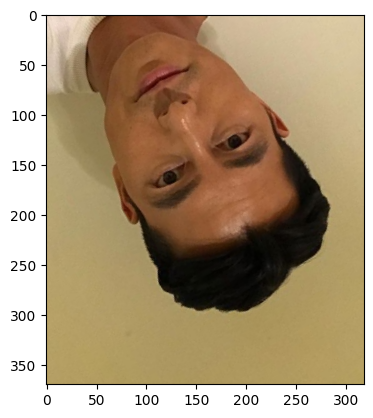

In [195]:
'''
#왜 이럴까???랜드마크가 맞지 않음

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력
'''

In [231]:
# 알파 채널이 없는 경우 추가하는 함수
def ensure_alpha_channel(image):
    """이미지에 알파 채널 추가 (필요 시)"""
    if image.shape[2] == 3:  # 이미지가 RGB인 경우
        alpha_channel = np.ones((image.shape[0], image.shape[1], 1), dtype=np.uint8) * 255
        image = np.concatenate((image, alpha_channel), axis=2)
    return image

# 좌표 복원 함수
def restore_coordinates(landmarks, img_shape, flipped_lr, flipped_tb, resized):
    """반전 및 크기 조정에 따른 랜드마크 좌표 복원"""
    if flipped_lr:  # 좌우 반전된 경우 복원
        landmarks = [(img_shape[1] - x, y) for x, y in landmarks]
    if flipped_tb:  # 상하 반전된 경우 복원
        landmarks = [(x, img_shape[0] - y) for x, y in landmarks]
    if resized:  # 크기 조정된 경우 복원
        landmarks = [(x * 2, y * 2) for x, y in landmarks]
    return landmarks

# 스티커 이미지에 알파 채널 추가 (필요한 경우)
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
if sticker_img.shape[2] != 4:
    sticker_img = ensure_alpha_channel(sticker_img)



In [232]:
# 좌표 복원 (반전 및 크기 조정의 영향을 제거)
if flipped_lr:
    landmarks = [(img_rgb.shape[1] - x, y) for x, y in landmarks]  # 좌우 반전 복원
if flipped_tb:
    landmarks = [(x, img_rgb.shape[0] - y) for x, y in landmarks]  # 상하 반전 복원
if resized:
    landmarks = [(x * 2, y * 2) for x, y in landmarks]  # 크기 복원

# 각도 계산 (눈 좌표 기반)
left_eye = landmarks[36]  # 왼쪽 눈
right_eye = landmarks[45]  # 오른쪽 눈
delta_x = right_eye[0] - left_eye[0]
delta_y = right_eye[1] - left_eye[1]
angle = np.degrees(np.arctan2(delta_y, delta_x))  # 얼굴 기울기 계산

point_30 = landmarks[30]  # 코 아래 (30번 랜드마크)
point_33 = landmarks[33]  # 코 중앙 (33번 랜드마크)


In [233]:
# 스티커를 이미지에 적용
def apply_sticker(img, sticker_img, center_x, center_y, angle, face_width):
    """얼굴 중심에 스티커를 회전 후 적용"""
    # 스티커 크기 계산
    sticker_width = int(face_width * 0.9)  # 얼굴 너비의 90% 크기
    sticker_height = int(sticker_img.shape[0] * (sticker_width / sticker_img.shape[1]))
    sticker_resized = cv2.resize(sticker_img, (sticker_width, sticker_height))

    # 스티커 회전
    rotation_matrix = cv2.getRotationMatrix2D((sticker_width // 2, sticker_height // 2), -angle, 1)
    rotated_sticker = cv2.warpAffine(
        sticker_resized, rotation_matrix, (sticker_width, sticker_height),
        flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0)
    )

    # 스티커 위치 계산
    sticker_x = center_x - sticker_width // 2
    sticker_y = center_y - sticker_height // 2

    # 스티커를 이미지에 적용
    for i in range(rotated_sticker.shape[0]):
        for j in range(rotated_sticker.shape[1]):
            if rotated_sticker[i, j, 3] != 0:  # 알파 채널이 0이 아닌 경우
                y_offset = sticker_y + i
                x_offset = sticker_x + j
                if 0 <= y_offset < img.shape[0] and 0 <= x_offset < img.shape[1]:
                    img[y_offset, x_offset] = rotated_sticker[i, j, :3]